In [1]:
# NOT SAFE TO DO 
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [3]:
# Manav's Data
imdb_title = pd.read_csv('Data/imdb.title.principals.csv.gz')
imdb_crew = pd.read_csv('Data/imdb.title.crew.csv.gz')
rating = pd.read_csv('Data/imdb.title.ratings.csv.gz')

# Nate's Data
title_basics_imdb = pd.read_csv('Data/imdb.title.basics.csv.gz')
akas_imdb = pd.read_csv('Data/imdb.title.akas.csv.gz')
name_basics_imdb = pd.read_csv('Data/imdb.name.basics.csv.gz')

# Nina's Data
tn_cleaned = pd.read_csv('Data/tn_cleaned.csv')
tndb_cleaned = pd.read_csv('Data/tmdb_cleaned.csv')
cleaned_bom = pd.read_csv('Data/cleaned_bom.csv')

# Cleaning the Data

In [4]:
# Rename akas title_id to tconst
akas_imdb.rename(columns = {'title_id':'tconst'}, inplace = True)

In [5]:
# Droping the birth year and death year for name_basics_imdb
name_basics_imdb.drop(['death_year'], axis = 1, inplace=True)
name_basics_imdb.drop(['birth_year'], axis = 1, inplace=True)

### Making all the movie titles lowercase.

In [6]:
tn_cleaned['movie'] = tn_cleaned['movie'].apply(lambda x: x.lower())
tndb_cleaned['original_title'] = tndb_cleaned['original_title'].apply(lambda x: x.lower())
tndb_cleaned['title'] = tndb_cleaned['title'].apply(lambda x: x.lower())
cleaned_bom['title'] = cleaned_bom['title'].apply(lambda x: x.lower())
title_basics_imdb['primary_title'] = title_basics_imdb['primary_title'].apply(lambda x: x.lower())
akas_imdb['title'] = akas_imdb['title'].apply(lambda x: x.lower())

In [7]:
# Changing 'movie' to 'title' for Nina's data
tn_cleaned.rename(columns= {'movie' : 'title'}, inplace=True)

In [8]:
# Merging on 'nconst'
nconst_merge = imdb_title.merge(name_basics_imdb, on = 'nconst')

In [9]:
# Dropping missing 'nconst' data
nconst_merge.dropna(subset = ['nconst'], inplace = True)

# Merging all the data from imdb together on `tconst`

In [10]:
merged_data = nconst_merge.merge(imdb_crew, on = 'tconst').merge(rating, on = 'tconst').merge(title_basics_imdb, on = 'tconst').merge(akas_imdb, on = 'tconst')
merged_data.head()

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,start_year,runtime_minutes,genres,ordering_y,title,region,language,types,attributes,is_original_title
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
2,tt5573596,7,nm0001445,actor,NaN,NaN,Martin Landau,"actor,producer,miscellaneous","tt0096316,tt0097123,tt0109707,tt0053125",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
3,tt5573596,1,nm0000925,actor,NaN,NaN,Steven Berkoff,"actor,writer,director","tt0086034,tt0086960,tt1243957,tt0066921",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0
4,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",nm0398271,...,2015,NaN,Comedy,1,remembering nigel,AU,NaN,NaN,NaN,0.0


# Merging Nina's Data with `imdb` on `title`

In [11]:
final_merge = merged_data.merge(tn_cleaned, on = 'title').merge(tndb_cleaned, on = 'title').merge(cleaned_bom, on = 'title')
final_merge

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,original_title_y,popularity,release_date_y,vote_average,vote_count,genre_id,Unnamed: 0,studio,domestic_gross_y,year
0,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
1,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
2,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
3,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
4,tt1226229,1,nm1706767,actor,NaN,"[""Aaron Green""]",Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196664,tt4333662,8,nm6350347,producer,producer,NaN,Sarah Mosses,producer,"tt4150444,tt4333662,tt5241966",nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,99.0,2747,BBC,7500.0,2016
196665,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,10402.0,2747,BBC,7500.0,2016
196666,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,99.0,2747,BBC,7500.0,2016
196667,tt4333662,9,nm8202353,producer,producer,NaN,John Schwartz,producer,tt4333662,nm2162785,...,they will have to kill us first,0.600,2015-08-04,5.0,1,10402.0,2747,BBC,7500.0,2016


## Restricting the data from `2015` to `2018`

In [12]:
# merged_data_cleaned = final_merge.loc[(final_merge['start_year'] >= 2015) & (final_merge['start_year'] <= 2018)]

In [13]:
# Looking to see the differnt regions
# merged_data_cleaned['region'].value_counts()

### Only looking at movies from the United States, `US`

In [14]:
only_us_merged = final_merge.loc[final_merge['region'] == 'US']
only_us_merged.head()

,tconst,ordering_x,nconst,category,job,characters,primary_name,primary_profession,known_for_titles,directors,...,original_title_y,popularity,release_date_y,vote_average,vote_count,genre_id,Unnamed: 0,studio,domestic_gross_y,year
1,tt1226229,3,nm0005253,actress,NaN,"[""Daphne Binks""]",Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
3,tt1226229,10,nm1015867,composer,NaN,NaN,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
5,tt1226229,1,nm1706767,actor,NaN,"[""Aaron Green""]",Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
7,tt1226229,2,nm1258970,actor,NaN,"[""Aldous Snow""]",Russell Brand,"actor,producer,writer","tt1334512,tt1336608,tt1226229,tt0800039",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010
9,tt1226229,4,nm0126284,actress,NaN,"[""Jackie Q""]",Rose Byrne,"actress,soundtrack,producer","tt1591095,tt2004420,tt3079380,tt1478338",nm0831557,...,get him to the greek,8.485,2010-06-04,5.9,980,35.0,68,Uni.,61000000.0,2010


### Making sure only english movies are counted

In [15]:
only_us_merged['language'].value_counts()

en    1370
Name: language, dtype: int64

## Droping columns that were not useful.

In [16]:
to_drop = ['job', 'characters', 'language', 'types', 'attributes'
           ,'is_original_title' , 'Unnamed: 0_x', 'id_x', 'id_y'
           , 'domestic_gross_y', 'Unnamed: 0', 'Unnamed: 0_y'
           ,'original_title_y']

only_us_merged.drop(labels = to_drop, axis = 1, inplace= True)

# Making Domestic and Worldwide Net Profit

In [17]:
only_us_merged['Domestic Net Profit'] = only_us_merged['domestic_gross_x'] - only_us_merged['production_budget']
only_us_merged['Worldwide Net Profit'] = only_us_merged['worldwide_gross'] - only_us_merged['production_budget']
only_us_merged.head(5)

,tconst,ordering_x,nconst,category,primary_name,primary_profession,known_for_titles,directors,writers,averagerating,...,original_language,popularity,release_date_y,vote_average,vote_count,genre_id,studio,year,Domestic Net Profit,Worldwide Net Profit
1,tt1226229,3,nm0005253,actress,Elisabeth Moss,"actress,producer,soundtrack","tt3993894,tt5834204,tt2756032,tt0172493",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
3,tt1226229,10,nm1015867,composer,Lyle Workman,"composer,soundtrack,music_department","tt0829482,tt0405422,tt0800039,tt1068680",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
5,tt1226229,1,nm1706767,actor,Jonah Hill,"actor,producer,writer","tt1232829,tt2294449,tt1210166,tt0993846",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
7,tt1226229,2,nm1258970,actor,Russell Brand,"actor,producer,writer","tt1334512,tt1336608,tt1226229,tt0800039",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875
9,tt1226229,4,nm0126284,actress,Rose Byrne,"actress,soundtrack,producer","tt1591095,tt2004420,tt3079380,tt1478338",nm0831557,"nm0831557,nm0781981",6.4,...,en,8.485,2010-06-04,5.9,980,35.0,Uni.,2010,21153526,51455875


### *Can include only looking at movies with an average rating of > 8  and votes > 500*

In [18]:
# good_films = only_us_merged[(only_us_merged['averagerating'] > 8) & (only_us_merged['numvotes'] > 500)]
# good_films.head(2)

In [19]:
# only_us_merged['year'].value_counts().sort_values

# EXPORT THE DATA

In [20]:
only_us_merged.to_csv('Data/imdb_cleaned_final.csv', index = False)

# Graphing `Runtime` vs `Worldwide Net Profit`

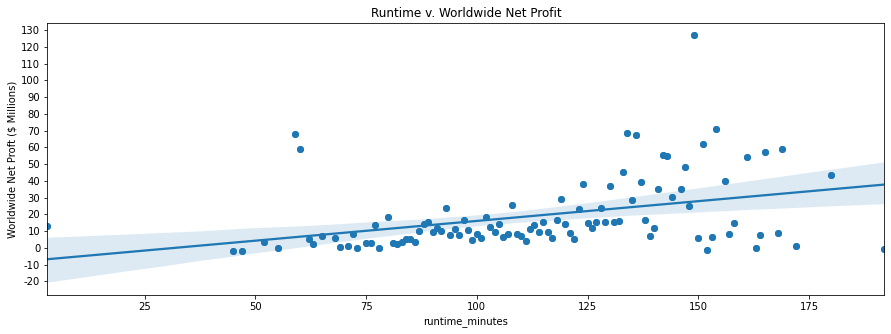

In [21]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('runtime_minutes')['Worldwide Net Profit'].mean().sort_values(ascending = False).index
y = only_us_merged.groupby('runtime_minutes')['Worldwide Net Profit'].mean().sort_values(ascending = False).values

ax.scatter(x,y)
ax.set_xlabel('Runtime in min')
ax.set_ylabel('Worldwide Net Proft ($ Millions)')
ax.set_title('Runtime v. Worldwide Net Profit')
ax.set_yticks(range(-200000000,2000000000, 100000000))
ax.set_yticklabels(range(-20,200,10))

sns.regplot(x,y);

## Correlation between the two variables

In [22]:
corr_1 = round(only_us_merged.corr()['runtime_minutes']['Worldwide Net Profit'], 2)
print(f'The correlation between runtime and worlwide net profits is {corr_1}')

The correlation between runtime and worlwide net profits is 0.27


When looking for a relationship between `runtime` and `worldwide net profits` we found a very weak correlation between the two variables. The correlation between the two variables is *0.27*, and looking at the scatter plot there is a tendency of the data below 120 minutes to have a low variance. However, when the runtime exceeds 125 minutes the variance of the data fluctuates greatly and no reasonable conclusion can be drawn from this. 

# Graphing `Runtime` vs `Average Rating`

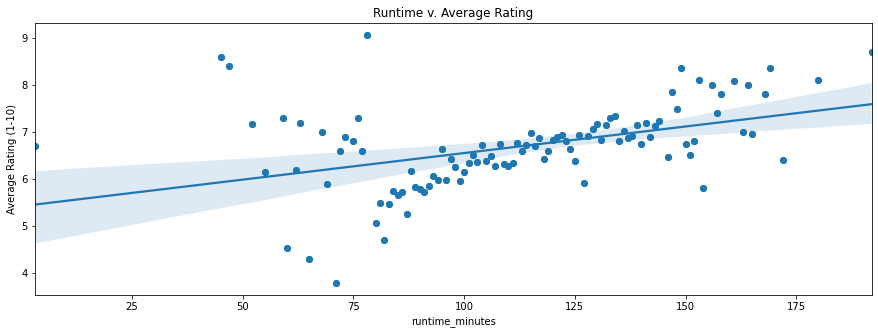

In [23]:
fig, ax = plt.subplots(figsize = (15,5))

x = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().index
y = only_us_merged.groupby('runtime_minutes')['averagerating'].mean().values

ax.scatter(x,y)
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Average Rating (1-10)')
ax.set_title('Runtime v. Average Rating')

sns.regplot(x,y);

## Correlation matrix between the two variables

In [24]:
corr_2 =  round(only_us_merged.corr()['runtime_minutes']['averagerating'], 2)

print(f'The correlation bewtween runtime and average rating is {corr_2}')

The correlation bewtween runtime and average rating is 0.39


When looking for a relationship between `runtime` and `average rating` we found a weak correlation between the two variables. The correlation between the two variables is *0.39*. However, this does not provide a good context of the data when looking at the scatter plot. We can see that most of the data below 90 minutes has a very large variance, and most of the data above 140 minutes has a greater than expected variance. While most of the data between 90 minutes and 140 minutes does have very low variance and some of the data is within our 95% confidence interval. We would be unable to make any reasonable conclusion from the data below 90 minutes and 140 minutes, and drawing a conclusion from the data between those two intervals would not account for any confounding variable. 